<h1 style="text-align: center;">MACHINE LEARNING</h1>

Now that we have some slight info about what and how our data looks like, we can proceed further with our Machine Learning part.\
Upto this point we know,
* **Task:** Classification Problem
* **Independent/Features Variables:**
    - Quantitative Features:
        - *Age*
        - *RestingBP*
        - *Cholesterol*
        - *MaxHR*
        - *Oldpeak*
    - Ordinal Features:
        - *FastingBS*
        - *Sex*
        - *ChestPainType*
        - *RestingECG*
        - *ExerciseAngina*
        - *ST_Slope*
* **Dependent/Target Variable:** HeartDisease
* **Proposed Approach:**
    * Convert Ordinal Features to Quantitative Features(Categorical -> Numerical)
    * Scale Values (if needed)
    * Apply Classification Algorithms like:
        - *Gaussian Naive Bayes*
        - *Nearest Neighbours*
        - *SVC*
        - *Decision Trees*
        - *Random Forest*
        - *Gradient Boosting*
        - *MLPClassifier*

## Import Libraries

In [1]:
# Future Warning Suppresor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil
from joblib import dump
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from matplotlib import cm

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

## Get data

In [2]:
data = pd.read_csv('data/kaggle/heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Now, for converting ordinal to categorical, we can either use an assessment map and map accordingly, or we can use pandas dummies. We'll be using both methods to see if we can get any difference in results.

In [4]:
#  Pandas dummies method
data_dummies = pd.get_dummies(data, drop_first=True)

In [5]:
# Dummified Data
data_dummies

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [6]:
# chestpain_map = {'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3}
# resting_map = {'Normal': 0, 'LVH': 1, 'ST': 2}
# exercise_map = {'N': 0, 'Y': 1}
# st_map = {'Flat': 0, 'Up': 1, 'Down': 2}
# sex_map = {'M': 0, 'F': 1}

In [7]:
# def numeric_features(data):
#     data = data.copy()
#     data['ChestPainType'] = data['ChestPainType'].map(chestpain_map)
#     data['Sex'] = data['Sex'].map(sex_map)
#     data['RestingECG'] = data['RestingECG'].map(resting_map)
#     data['ExerciseAngina'] = data['ExerciseAngina'].map(exercise_map)
#     data['ST_Slope'] = data['ST_Slope'].map(st_map)
#     return data

In [8]:
# data_mapped = numeric_features(data)

## Train/Test split'
Now, we will split our data into training and testing data and work accordingly

In [9]:
# Separate Features and Target Variable
X = data_dummies.drop(["HeartDisease"], axis=1)
y = data_dummies["HeartDisease"]

# Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, stratify = y, random_state = 123)

## Scaling

Instead of scaling at each model's pipeline, we will scale our data once and then use it in all models

In [10]:
# Initiate Scaler
scaler = StandardScaler()

In [11]:
# Scale X_train and X_valid
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [12]:
# Save scaled data in order to maintain test reproducibility 
!mkdir -p data/scaled
np.save('data/scaled/X_train.npy', X_train_scaled)
np.save('data/scaled/X_valid.npy', X_valid_scaled)
np.save('data/scaled/y_train.npy', y_train)
np.save('data/scaled/y_valid.npy', y_valid)

## Prepare dataframe for logging test scores

In [13]:
iterables = [['Base Model', 'Tuned Model'],['Train', 'Valid']]
multi = pd.MultiIndex.from_product(iterables, names=['Iteration', 'Accuracy'])
scores = pd.DataFrame(np.zeros(7*4).reshape(7,4),
                      index = ['GaussianNB',  'SVC', 'KNN', 'Decision Trees', 'Random Forest', 'Gradient Boosting',
                              'MLP Classifier'],
                      columns=multi)
scores

Iteration         Base Model       Tuned Model      
Accuracy               Train Valid       Train Valid
GaussianNB               0.0   0.0         0.0   0.0
SVC                      0.0   0.0         0.0   0.0
KNN                      0.0   0.0         0.0   0.0
Decision Trees           0.0   0.0         0.0   0.0
Random Forest            0.0   0.0         0.0   0.0
Gradient Boosting        0.0   0.0         0.0   0.0
MLP Classifier           0.0   0.0         0.0   0.0

## Results functions

In [14]:
# Output template
OUTPUT_TEMPLATE = (
    'Classifier :  {name}\n'
    'Train Score:  {train_score:.3f}\n'
    'Valid Score:  {valid_score:.3f}\n'
)

def outData(results):
    print(OUTPUT_TEMPLATE.format(
        name=results[0],
        train_score=results[1],
        valid_score=results[2],
        ))

    print("Classification Report:")
    print(classification_report(results[3], results[4]))
    print("")

## Base Model Training (train model with default parameter)
For the initial run, we will use our models as it is with the default parameters. We will be tuning them later

In [15]:
# Directory to save models
if not os.path.exists("models/base"):
    print("Initiated Base Models directory!")
    os.makedirs("models/base")
else:
    print("Base Models directory already exists!")

Base Models directory already exists!


In [16]:
# Train Model Function
def train_model(model, modelName, X_train, y_train, X_valid, y_valid):
    model = model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    valid_score = model.score(X_valid, y_valid)
    outData([modelName, 
             model.score(X_train, y_train),
             model.score(X_valid, y_valid),
             y_valid,
             model.predict(X_valid),
             model.predict_proba(X_valid)])
    print("\nConfusion Matrix\n")
    plot_confusion_matrix(model,X_valid,y_valid,cmap='gnuplot',normalize='true')
    plt.show()
    dump(model, 'models/base/' + modelName + '.joblib')
    return  (train_score, valid_score)

### 1. GaussianNB

Classifier :  GaussianNB
Train Score:  0.863
Valid Score:  0.862

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        62
           1       0.89      0.86      0.87        76

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138



Confusion Matrix



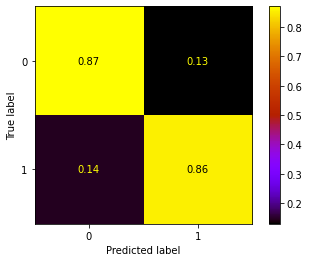

In [17]:
# Initiate model
model = GaussianNB()

# Train model
train, valid = train_model(model, "GaussianNB", X_train_scaled, y_train, X_valid_scaled, y_valid)
scores.loc['GaussianNB', ['Base Model'][0]].loc['Train'] = train
scores.loc['GaussianNB', ['Base Model'][0]].loc['Valid'] = valid

### 2. SVC

Classifier :  SVC
Train Score:  0.918
Valid Score:  0.870

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        62
           1       0.87      0.89      0.88        76

    accuracy                           0.87       138
   macro avg       0.87      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138



Confusion Matrix



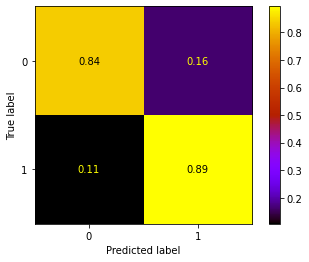

In [18]:
# Initiate model
model = SVC(probability=True)

# Train model
train, valid = train_model(model, "SVC", X_train_scaled, y_train, X_valid_scaled, y_valid)
scores.loc['SVC', ['Base Model'][0]].loc['Train'] = train
scores.loc['SVC', ['Base Model'][0]].loc['Valid'] = valid

### 3. KNearestNeighbours

Classifier :  KNN
Train Score:  0.900
Valid Score:  0.884

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        62
           1       0.88      0.92      0.90        76

    accuracy                           0.88       138
   macro avg       0.89      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138



Confusion Matrix



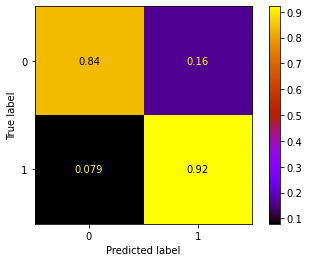

In [19]:
# Initiate model
model = KNeighborsClassifier()

# Train model
train, valid = train_model(model, "KNN", X_train_scaled, y_train, X_valid_scaled, y_valid)
scores.loc['KNN', ['Base Model'][0]].loc['Train'] = train
scores.loc['KNN', ['Base Model'][0]].loc['Valid'] = valid

### 4. Decision Trees

Classifier :  Decision Trees
Train Score:  1.000
Valid Score:  0.790

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77        62
           1       0.81      0.80      0.81        76

    accuracy                           0.79       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.79      0.79      0.79       138



Confusion Matrix



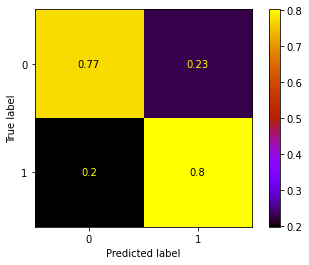

In [20]:
# Initiate model
model = DecisionTreeClassifier()

# Train Model
train, valid = train_model(model, "Decision Trees", X_train_scaled, y_train, X_valid_scaled, y_valid)
scores.loc['Decision Trees', ['Base Model'][0]].loc['Train'] = train
scores.loc['Decision Trees', ['Base Model'][0]].loc['Valid'] = valid

### 5. Random Forest

Classifier :  Random Forest
Train Score:  1.000
Valid Score:  0.870

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        62
           1       0.88      0.88      0.88        76

    accuracy                           0.87       138
   macro avg       0.87      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138



Confusion Matrix



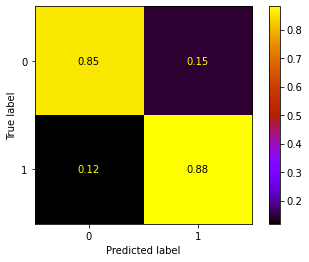

In [21]:
# Initiate model
model = RandomForestClassifier()

# Train model
train, valid = train_model(model, "Random Forest", X_train_scaled,  y_train, X_valid_scaled, y_valid)
scores.loc['Random Forest', ['Base Model'][0]].loc['Train'] = train
scores.loc['Random Forest', ['Base Model'][0]].loc['Valid'] = valid

### 6. Gradient Boosting

Classifier :  Gradient Boosting
Train Score:  0.946
Valid Score:  0.870

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        62
           1       0.89      0.87      0.88        76

    accuracy                           0.87       138
   macro avg       0.87      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138



Confusion Matrix



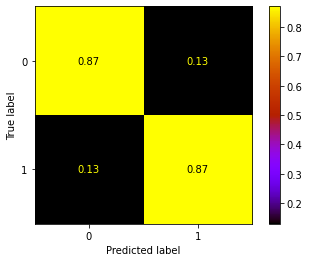

In [22]:
# Initiate model
model = GradientBoostingClassifier()

# Train model
train, valid = train_model(model, "Gradient Boosting", X_train_scaled, y_train, X_valid_scaled, y_valid)
scores.loc['Gradient Boosting', ['Base Model'][0]].loc['Train'] = train
scores.loc['Gradient Boosting', ['Base Model'][0]].loc['Valid'] = valid

### 7. MLP Classifier

Classifier :  MLP Classifier
Train Score:  0.926
Valid Score:  0.862

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        62
           1       0.87      0.88      0.88        76

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138



Confusion Matrix



/home/ubuntu/project/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


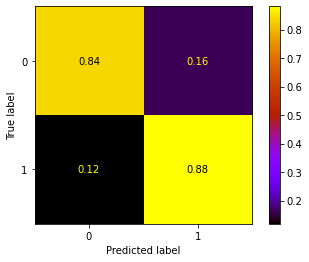

In [23]:
# Initiate Model
model = MLPClassifier()

# Train Model
train_model(model, "MLP Classifier", X_train_scaled, y_train, X_valid_scaled, y_valid)
scores.loc['MLP Classifier', ['Base Model'][0]].loc['Train'] = train
scores.loc['MLP Classifier', ['Base Model'][0]].loc['Valid'] = valid

The above warning means that even though the base MLP model ran 200 iterations on our data, it was still not able to converge it. We will try to find optimum hyperparameters later.

In [24]:
scores

Iteration         Base Model           Tuned Model      
Accuracy               Train     Valid       Train Valid
GaussianNB          0.862821  0.862319         0.0   0.0
SVC                 0.917949  0.869565         0.0   0.0
KNN                 0.900000  0.884058         0.0   0.0
Decision Trees      1.000000  0.789855         0.0   0.0
Random Forest       1.000000  0.869565         0.0   0.0
Gradient Boosting   0.946154  0.869565         0.0   0.0
MLP Classifier      0.946154  0.869565         0.0   0.0

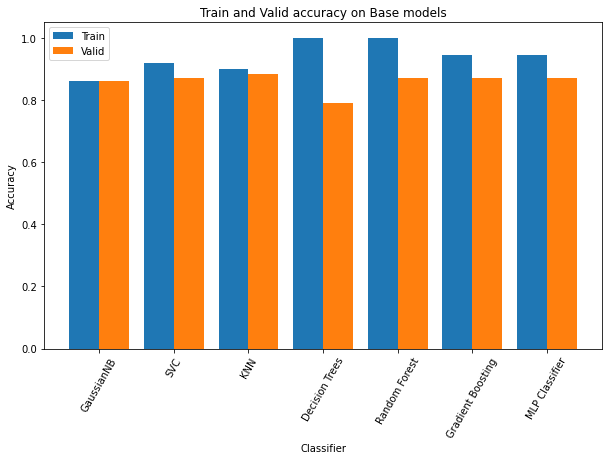

In [25]:
# Plot Base Model Train and Valid Accuracy
x_axis = np.arange(len(scores.index))

plt.figure(figsize=(10,6))
plt.bar(x_axis - 0.2, scores['Base Model']['Train'].values, 0.4, label = 'Train')
plt.bar(x_axis + 0.2, scores['Base Model']['Valid'].values, 0.4, label = 'Valid')
plt.xticks(x_axis, list(scores.index), rotation=60)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Train and Valid accuracy on Base models")
plt.legend()
plt.show()

In [26]:
## Save multicolumn scores
buf = StringIO()
scores.to_csv(buf)

with open('data/scores.csv', 'w') as file:
    buf.seek(0)
    shutil.copyfileobj(buf, file)